# Working upwelling model summary

This notebook is a collection of theoretical upwelling models used in Moore-Maley, Allen, et al. in prep.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm.notebook import tqdm

%matplotlib inline

In [35]:
plt.rcParams['font.size'] = 12

***

## Working diagram

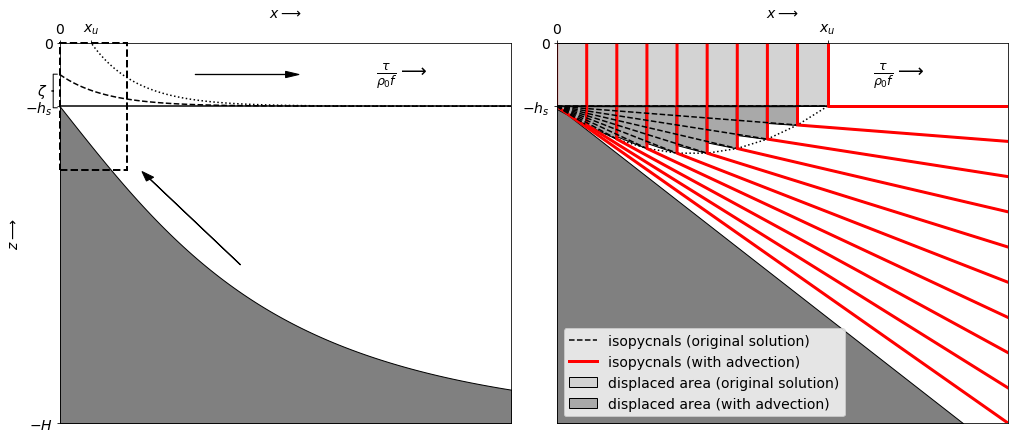

In [5]:
# Figure area and formatting
fig, axs = plt.subplots(1, 2, figsize=(17, 7), gridspec_kw={'wspace': 0.1})
for n, ax in zip(range(2), axs):
    xticks, yticks, xlabels, ylabels = [0, 0.6], [0, 0.2], [0, '$x_u$'], ['$-h_s$', 0]
    if n == 0: yticks.insert(0, -1), ylabels.insert(0, '$-H$'); xticks[1] = 0.07
    ax.plot([0, 1], [0, 0], 'k-')
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 0.2])
    ax.xaxis.set_ticks(xticks)
    ax.yaxis.set_ticks(yticks)
    ax.xaxis.set_ticklabels(xlabels)
    ax.yaxis.set_ticklabels(ylabels)
    ax.set_xlabel('$x \\longrightarrow$')
    ax.text(0.7, 0.09, '$\\frac{\\tau}{\\rho_0f} \longrightarrow$', fontsize=18)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    #ax.text(0.95, 0.15, f'({chr(97+n)})')

# Left panel
x = np.linspace(-0, 1, 100)
axs[0].set_ylabel('$z \\longrightarrow$')
axs[0].annotate(
    '$\zeta$', xy=(-0.01, 0.048), xytext=(-0.05, 0.048), annotation_clip=False,
    arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=0.3'), va='center',
)
axs[0].fill_between(x, -np.arctan(2*np.tanh(x))/np.arctan(2), -1, facecolor='gray', edgecolor='k')
axs[0].plot(x, 0.1*np.exp(-10*x), 'k--')
axs[0].plot(x, 0.4*np.exp(-10*x), 'k:')
axs[0].arrow(0.4, -0.5, -0.2, 0.27, fc='k', head_width=0.02)
axs[0].arrow(0.3, 0.1, 0.2, 0, fc='k', head_width=0.02)
axs[0].add_patch(Rectangle([0, -0.2], 0.15, 0.4, fill=None, edgecolor='k', linestyle='--', linewidth=2, clip_on=False))

# Right panel
labels = [
    'isopycnals (original solution)',
    'isopycnals (with advection)',
    'displaced area (original solution)',
    'displaced area (with advection)',
]
X, slope = np.linspace(0, 0.6, 10), np.linspace(-1, 0, 10)
axs[1].fill_between([0, 0.9], [0, -1], -1, facecolor='gray', edgecolor='k')
axs[1].fill_between([0, 0.6], [0.2, 0.2], facecolor='lightgray', edgecolor='k', label=labels[2], zorder=2)
axs[1].plot(X, X*slope, 'k:')
for x, s in zip(X, slope):
    label = labels if s == -1 else [None, None, None, None]
    axs[1].fill_between([x-0.07, x], np.array([x-0.06, x])*s, facecolor='darkgray', edgecolor='k', label=label[3])
    axs[1].plot([0, 1], np.array([0, 1])*s, 'k--', label=label[0])
    axs[1].plot([x, x, 1], [0.2, x*s, s], 'r-', linewidth=3, label=label[1])

# Add legend
axs[1].legend(loc=3)
#fig.savefig('/home/bmoorema/Desktop/CMOS2020/slides/figures/isopycnal_diagram.pdf', bbox_inches='tight')

***

## Functions and definitions

In [54]:
# Definitions
f, g, rho_0, H = 1e-4, 9.81, 1e3, 1e2

***

## Theoretical models

### Surface layer pycnocline response

#### Method 1: Mass balance

To conserve mass

$$\underbrace{\zeta L_s}_{\text{upwelled area}} = \underbrace{\frac{\tau t}{\rho_0f}}_{\text{Ekman flux}}$$

where $L_s = \sqrt{g'h_s}/f$. Solving for $\zeta/h_s$ gives

$$\frac{\zeta}{h_s} = \frac{\tau}{\rho_0g'h_s}\frac{L_s}{h_s}ft$$

The coefficient of the solution is the inverse of the Wedderburn number

$$W_s = \frac{\rho_0g'h_s}{\tau}\frac{h_s}{L_s}$$

which is commonly used to describe upwelling in lakes.

#### Method 2: 2-layer model

Lower layer baroclinic momentum balance

\begin{align}
-fV & = -g'h_s\frac{\partial\zeta}{\partial x} \\
\frac{\partial V}{\partial t} + fU & = -\frac{\tau}{\rho_0} \\
\frac{\partial\zeta}{\partial t} + \frac{\partial U}{\partial x} & = 0
\end{align}

Linear time solutions

$$\zeta = \zeta_1ft + \zeta_0, \hspace{1cm} V = V_1ft + V_0, \hspace{1cm} U = U_0$$

Substituting (4) into (1) gives the following proportional to $t$

$$-fV_1 = -g'h_s\frac{\partial\zeta_1}{\partial x}$$

and the following constant

\begin{align}
-fV_0 & = -g'h_s\frac{\partial\zeta_0}{\partial x} \\
V_1 + U_0 & = -\frac{\tau}{\rho_0f} \\
f\zeta_1 + \frac{\partial U_0}{\partial x} & = 0
\end{align}

Eliminating variables gives the following equation for $\zeta_1$

$$\frac{\partial^2\zeta_1}{\partial x^2} - \frac{1}{L_s^2}\zeta_1 = 0$$

At the boundary $U_0\to0$ thus the boundary condition on $\zeta_1$ is

$$\frac{\partial\zeta_1}{\partial x} = -\frac{\tau}{\rho_0g'h_s}$$

The solution for $\zeta_1$ given the boundary condition is

$$\zeta_1 = \frac{\tau L_s}{\rho_0g'h_s}e^{-x/L_s}$$

Assuming $\zeta_0 = 0$, $\zeta$ at $x=0$ scaled by $h_s$ is again the Wedderburn number dependence obtained from the mass balance

$$\frac{\zeta}{h_s} = \frac{\tau}{\rho_0g'h_s}\frac{L_s}{h_s}ft = \frac{ft}{W_s}$$

Plots below demonstrate the pycnocline response in parameter space.

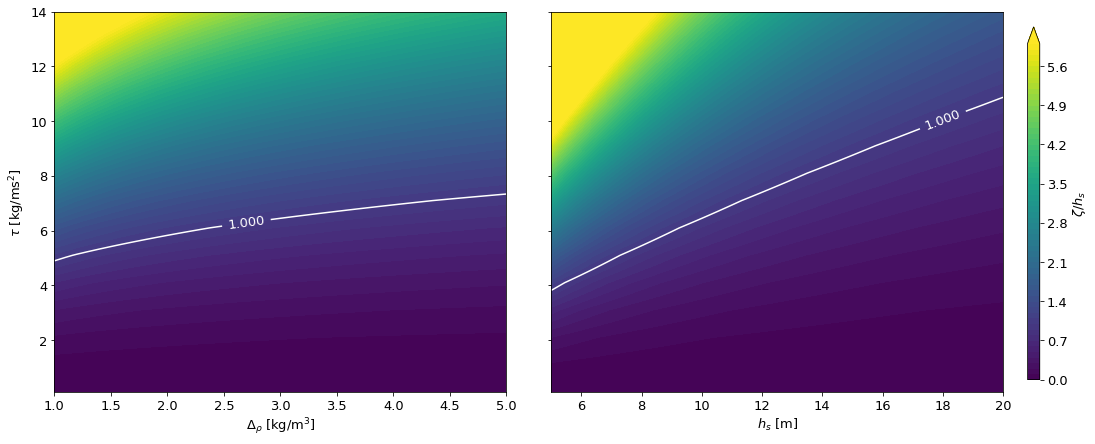

In [5]:
# --- Plot pycnocline displacement in parameter space after 1 day

# Make figure panels
fig, axs = plt.subplots(1, 2, figsize=(17, 7), gridspec_kw={'wspace': 0.1})

# Panel parameters
x_list = [np.arange(1, 5.1, 0.1), np.arange(5, 20.1, 0.1)]
var_list = ['rho', 'h_s']
labels = ['$\Delta_\\rho$ [kg/m$^3$]', '$h_s$ [m]']
t = 86400

# Loop through panels
for ax, x, var, label in zip(axs, x_list, var_list, labels):

    # Define panel parameter space
    x, U = np.meshgrid(x, np.arange(0.1, 15))
    tau = 1.5e-3 * U**2
    Delta_rho, h_s = 3, 10
    if var == 'rho': Delta_rho = x
    else: h_s = x

    # Calculate pycnocline displacement
    g_prime = g * Delta_rho / rho_0
    L_s = np.sqrt(g_prime * h_s) / f
    W_s = rho_0 * g_prime * h_s / tau * h_s / L_s
    eta = f * t / W_s

    # Plot displacement contours
    c = ax.contourf(x, U, eta, levels=np.arange(0, 6.01, 0.1), extend='max')
    cs = ax.contour(x, U, eta, levels=[1], colors='w')
    ax.clabel(cs)
    ax.set_ylim([0.1, 14])
    ax.set_xlabel(label)

# Final formatting
axs[0].set_ylabel('$\\tau$ [kg/ms$^2$]')
axs[1].yaxis.set_ticklabels('')
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='$\zeta/h_s$')
plt.show()

***

## Lower layer models

In [57]:
# Lower layer model parameters
h_s, tau, N, t = 10, 0.2, 0.01, 86400

***

### Lower layer continuous stratification response (minimal advection)

#### Governing equations

Momentum balance

\begin{align}
-fv & = -\frac{1}{\rho_0}\frac{\partial p}{\partial x} \\
\frac{\partial v}{\partial t} + fu & = 0 \\
\frac{\partial p}{\partial z} + \rho g & = 0\\
\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} & = 0 \\
\frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} & = 0
\end{align}

Where density is decomposed as

$$\rho = \rho_0 + \rho_*(z) + \rho'(t, x, z)$$

and the onshore transport must balance the offshore surface Ekman transport

$$U = -\frac{\tau}{\rho_0f}$$

#### Scaling arguments

Introducing the following nondimensional variable substitutions

$$t = T\hat{t}, \hspace{0.5cm} x = L_d\hat{x}, \hspace{0.5cm} z = H\hat{z}, \hspace{0.5cm} u = U\hat{u}, \hspace{0.5cm} w = \frac{UH}{L_d}\hat{w}, \hspace{0.5cm} \rho' = \Delta\rho\hat{\rho}'$$

and substituting into the density transport equation gives

$$\frac{T_L}{T}\frac{\partial\hat{\rho}'}{\partial\hat{t}} + \hat{u}\frac{\partial\hat{\rho}'}{\partial\hat{x}} + \hat{w}\frac{\partial\hat{\rho}'}{\partial\hat{z}} - \frac{\Delta\rho_H}{\Delta\rho}\hat{w} = 0$$

where

$$T_L = \frac{L_d}{U}, \hspace{1cm} L_d = \frac{NH}{f}, \hspace{1cm} \Delta\rho_H = \frac{\rho_0N^2H}{g}, \hspace{1cm}  N = \sqrt{-\frac{g}{\rho_0}\frac{\partial\rho_*}{\partial z}}$$

If $T \ll T_L$ and $\Delta\rho \ll \Delta\rho_H$ then the order 1 advection terms are small and disregarded. The density transport equation becomes

$$\frac{\partial\rho}{\partial t} + w\frac{\partial\rho_*}{\partial z} = 0$$

#### Velocity field solution

The streamfunction satisfies the continuity equation

$$u = \frac{\partial\psi}{\partial z}, \hspace{1cm} w = -\frac{\partial\psi}{\partial x}$$

Combining the governing equations to eliminate variables gives

$$L_d^2\frac{\partial^2\psi}{\partial x^2} + H^2\frac{\partial^2\psi}{\partial z^2} = 0$$

Transforming to polar coordinates allows a solution over a wedge topography

$$\frac{1}{r}\frac{\partial}{\partial r}\left(r\frac{\partial\psi}{\partial r}\right) + \frac{1}{r^2}\frac{\partial^2\psi}{\partial\theta^2} = 0$$

where

$$r = L_d\sqrt{\left(\frac{x}{L_d}\right)^2 + \left(\frac{z}{H}\right)^2}, \hspace{1cm} \theta = \tan^{-1}\left(\frac{L_d}{H}\frac{z}{x}\right)$$

The transport boundary condition and the streamfunction definition together imply that the difference in $\psi$ across the lower layer is equal to the surface Ekman flux

$$\psi(r, 0) = 0, \hspace{1cm} \psi(r, \phi) = \frac{\tau}{\rho_0f}$$

where $\phi=\tan^{-1}S$ is the angle of the bottom boundary and $S=H_xN/f$ is the slope Burger number given bottom slope $H_x$. Assuming no radial dependence, the equation for $\psi$ is simply a linear function of $\theta$, or in Cartesian coordinates

$$\psi = -\frac{\tau}{\rho_0f}\frac{1}{\tan^{-1}S}\tan^{-1}\left(\frac{L_d}{H}\frac{z}{x}\right)$$

The cross-shore velocities are
\begin{align}
u = \frac{\partial\psi}{\partial z} & = -\frac{\tau}{\rho_0f\tan^{-1}S}\left(\frac{x/L_d}{\left(z/H\right)^2 + \left(x/L_d\right)^2}\right) \\
w = -\frac{\partial\psi}{\partial x} & = -\frac{\tau}{\rho_0N\tan^{-1}S}\left(\frac{z/H}{\left(z/H\right)^2 + \left(x/L_d\right)^2}\right)
\end{align}

#### Density field solution

*This part is contentious because we use a different density transport equation from the velocity solution*

Return to the full density transport equation ($u$ and $w$ are now known)

$$\frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} = 0$$

We also know the initial profile

$$\rho(x, z, 0) = \rho_*(z) + \rho_0 = \rho_0\left(1 + \frac{N^2z}{g}\right)$$

Since this is a quasi-linear, first-order PDE, we use the Method of Characteristics. Let $s$ be a manifold in $x, z, t, \rho$ space. Along this manifold, the total derivative with respect to $s$ is

$$\frac{d}{ds}\rho(x(s), z(s), t(s)) = \frac{dt}{ds}\frac{\partial\rho}{\partial t} + \frac{dx}{ds}\frac{\partial\rho}{\partial x} + \frac{dz}{ds}\frac{\partial\rho}{\partial z}$$

If the $s$ derivatives are defined as the coefficients of the density transport equation, then

$$\frac{d\rho}{ds} = \frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} = 0$$

and solving $\rho$ amounts to solving the system of ODEs given by the coefficients

$$\frac{dt}{ds} = 1, \hspace{1cm} \frac{dx}{ds} = u, \hspace{1cm} \frac{dz}{ds} = w$$

Since $d\rho/ds = 0$, $\rho$ can be determined from any known set of values along a given $(x, z, t)$ curve through $s$. These values are given as the initial density profile at $(z_0, 0)$

$$\rho(z_0, 0) = \rho_0\left(1 + \frac{N^2z_0}{g}\right)$$

Solving the ODE system, the first equation gives

$$t = s$$

and second and third equations along with the velocity solutions above imply (where $k$ is some integration constant)

$$\frac{1}{x}\frac{dx}{ds} = \frac{1}{z}\frac{dz}{ds} \hspace{1cm} \longrightarrow \hspace{1cm} k\frac{z}{H} = \frac{x}{L_d}$$

Now the ODE for $z$ is (substituting $kz/H = x/L_d$)

$$\frac{dz}{ds} = w = -\frac{H}{z}\frac{\tau}{\rho_0N\tan^{-1}S}\left(\frac{1}{1 + k^2}\right)$$

which is separable and has the following solution

$$z^2 = z_0^2 - \frac{2\tau s}{\rho_0N\tan^{-1}S}\left(\frac{1}{1 + k^2}\right)$$

where from the previous ODE system solutions, $s = t$ and $k = Hx/L_dz$. Rearranging for $z_0$ and substituting into $\rho(z_0, 0)$ gives the complete solution for $\rho$

$$\rho(x, z, t) = \rho_0\left(1 + \frac{N^2z}{gH}\sqrt{H^2 + \frac{2\tau t}{\rho_0N\phi}\left(\frac{1}{\left(z/H\right)^2 + \left(x/L_d\right)^2}\right)}\right)$$

The density field and streamfunction solutions are shown plotted below

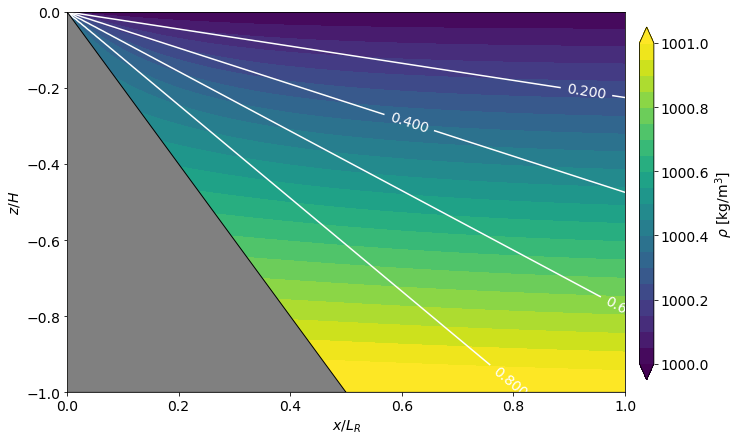

In [71]:
# --- Plot density and streamline cross-section after 1 day

# Make figure panels
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim([0, 1])
ax.set_ylim([-1, 0])
ax.set_xlabel('$x/L_d$')
ax.set_ylabel('$z/H$')

# Define parameters
H_x = 0.02
S = H_x * N / f
L_d = N * H / f

# Make plot arrays
xi = np.arange(1, L_d)
zi = np.concatenate((np.arange(-H, 0), np.arange(-0.9, 0, 0.1)))
x, z = np.meshgrid(xi, zi)

# Calculate streamfunction and density fields
psi = -tau / (rho_0 * f * np.arctan(S)) * np.arctan(N * z / (f * x))
rho_star = -rho_0 * N**2 * z / g
rho = rho_star * np.sqrt(1 + 2 * tau * t / (rho_0 * N * np.arctan(S)) / (z**2 + (f * x / N)**2)) + rho_0

# Plot fields
c = ax.contourf(x/L_d, z/H, rho, levels=np.arange(1000, 1001.01, 0.05), extend='both')
cs = ax.contour(x/L_d, z/H, psi, levels=np.arange(0.2, 1, 0.2), colors='w')
ax.fill_between(xi/L_d, -alpha*xi/H, -1, facecolor='gray', edgecolor='k', zorder=10)
ax.clabel(cs)

# Formatting
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(c, cax=cax, label='$\\rho$ [kg/m$^3$]', ticks=np.arange(1000, 1001.1, 0.2), format='%.1f')
plt.show()

***

### Lower layer continuous stratification response (full advection)

#### Governing equations

Retaining the full density and momentum advection terms, the momentum balance becomes

\begin{align}
-fv & = -\frac{1}{\rho_0}\frac{\partial p}{\partial x} \\
\frac{\partial v}{\partial t} + u\frac{\partial u}{\partial x} + w\frac{\partial u}{\partial z} + fu & = -\frac{1}{\rho_0}\frac{\partial p}{\partial y} \\
\frac{\partial p}{\partial z} + \rho g & = 0\\
\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} & = 0 \\
\frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} & = 0
\end{align}

The longshore pressure gradient is assumed constant such that the onshore flow is geostrophically balanced in the farfield, e.g.,

$$\frac{\partial p}{\partial y} = \frac{\tau}{H} \hspace{1cm} \left(\frac{x}{L_d} \gg 1\right)$$

where $H$ is the vertical length scale, $L_d = NH/f$ is the deformation radius of the continuously stratified lower layer, and $N$ is the Brunt-V&#0228;is&#0228;l&#0228; frequency

$$N = \sqrt{-\frac{g}{\rho_0}\frac{\partial\rho}{\partial z}}$$

then this is the model of Pedlosky (1978).

#### Solutions

Choboter et al. (2011) expanded on Pedlosky by solving over a prescribed sloping cross-shore topography

$$z_b(x) = -\frac{H}{\mu}\tan^{-1}\bigg(\tan\mu\tanh\big(\mu x/L_d\big)\bigg)$$

where $\mu$ is the angle of the nondimensionalized bottom slope at the coast

$$\tan{\mu} = -\frac{L_d}{H}\frac{\partial z_B}{\partial x}\bigg|_{x=0} = H_x\frac{N}{f} = S$$

The nondimensionalized bottom slope $S = H_xN/f$ holds special significance as the slope Burger number. Using a stream function definition for the cross-shore velocity field that satisfies the continuity equation

$$u = \frac{\partial\psi}{\partial z}, \hspace{1cm} w = -\frac{\partial\psi}{\partial x}$$

and the condition that the bottom layer transport equals the surface Ekman transport, Choboter et al. found the following solutions

\begin{align}
\psi(x, z) & = -\frac{\tau}{\rho_0f\mu}\tan^{-1}\bigg\{\coth\big(\mu x/L_d\big)\tan\big(\mu z/H\big)\bigg\} \\
v(x, z, t) & = NH\left[\frac{t}{T} - \frac{x}{L_R} -\frac{1}{2\mu}\cosh^{-1}\left\{\cosh\big(2\mu x/L_d\big) - \frac{\sinh^2\big(2\mu x/L_d\big)\big(1 - e^{2\mu t/T}\big)}{\cosh\big(2\mu x/L_d\big) - \cos\big(2\mu z/H\big)}\right\}\right] \\
\rho(x, z, t) & = \frac{\Delta\rho}{2\mu}\cos^{-1}\left\{\cos\big(2\mu z/H\big) - \frac{\sin^2\big(2\mu z/H\big)\left(1 - e^{-2\mu t/T}\right)}{\cosh\big(2\mu x/L_d\big) - \cos\big(2\mu z/H\big)}\right\} + \rho_0
\end{align}

where $\Delta\rho = \rho_0N^2H/g$ is the initial density difference across the lower layer and $T = \rho_0fHL_d/\tau$ is the Ekman transport time scale.

/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in arccos


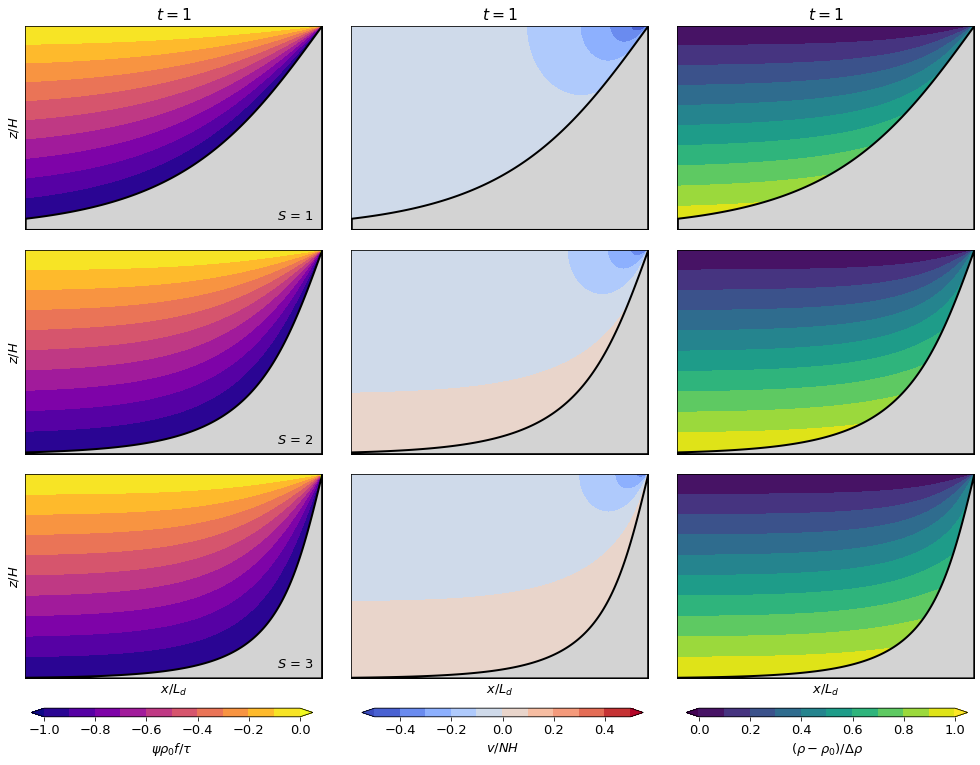

In [41]:
# Make figure layout
fig, axs = plt.subplots(3, 3, figsize=(17, 12), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

# Define parameters and dimensions
xi, zi = np.arange(-2, 0.01, 0.01), np.arange(-1, 0.01, 0.01)
x, z = np.meshgrid(xi, zi)

# Loop through Burger numbers
for n, row, H_x in zip(range(3), axs, [0.01, 0.02, 0.03]):

    # Calculate shared terms
    L_d = N * H / f
    W_d = rho_0 * (N * H)**2 / tau * H / L_d
    S = H_x * N / f
    mu = np.arctan(S)

    # Calculate bathymetry
    z_b = 1 / mu * np.arctan(np.tan(mu) * np.tanh(mu * xi))

    # Calculate solutions
    exp = 2 * mu * f * t / W_d
    denom = np.cosh(2 * mu * x) - np.cos(2 * mu * z)
    psi = -np.arctan(np.cosh(mu * x) / np.sinh(mu * x) * np.tan(mu * z)) / mu
    v = f* t / W_d - x - np.arccosh(np.cosh(2 * mu * x) - np.sinh(2 * mu * x)**2 * (1 - np.exp(exp)) / denom) / (2 * mu)
    rho = np.arccos(np.cos(2 * mu * z) - np.sin(2 * mu * z)**2 * (1 - np.exp(-exp)) / denom) / (2 * mu)

    # Plot solutions
    row[0].set_ylabel('$z/H$')
    row[0].text(0.85, 0.05, f'$S$ = {S:.0f}', transform=row[0].transAxes, zorder=2)
    variables, labels = [psi, v, rho], ['$\psi\\rho_0f/\\tau$', '$v/NH$', '$(\\rho - \\rho_0)/\\Delta\\rho$']
    levels, cmaps = [[-1, 0.1], [-0.5, 0.6], [0, 1.1]], ['plasma', 'coolwarm', 'viridis']
    for ax, xpos, var, label, level, cmap in zip(row, [0.13, 0.4, 0.665], variables, labels, levels, cmaps):
        c = ax.contourf(x, z, var, levels=np.arange(*level, 0.1), cmap=cmap, extend='both', zorder=0)
        ax.fill_between(xi, z_b, y2=-1, facecolor='lightgray', edgecolor='k', linewidth=2, zorder=1)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        if n == 0: ax.set_title('$t=1$')
        if n == 2:
            ax.set_xlabel('$x/L_d$')
            cax = fig.add_axes([xpos, 0.08, 0.23, 0.01])
            fig.colorbar(c, cax=cax, orientation='horizontal', label=label)

#### Upwelling parameters

It is useful to redefine the time scale $T$ in terms of a deep Wedderburn number $W_d$

$$T = \frac{1}{f}\frac{\rho_0c^2}{\tau}\frac{H}{L_d} = \frac{W_d}{f}$$

where $c = NH$ is the baroclinic wave speed of the continuously stratified lower layer. Complete upwelling of the lower layer thus proceeds with an $e$-folding time $t_u$ determined by a combination of $W_d$ and the slope Burger number $S$

$$\boxed{\hspace{0.2cm}t_u = \frac{W_d}{2f\tan^{-1}S}\hspace{0.2cm}}$$

At the coast, we define the density of the deepest isopynal to reach the top of the lower layer as $\rho_u$. We obtain this density by evaluating the density field along the bottom $z_b$ and taking the limit as $x\to0$

$$\rho_u(t) = \lim_{x\to0}\rho(x, z_b, t) = \frac{\Delta\rho}{2\tan^{-1}S}\cos^{-1}\left\{1 - \frac{2S^2}{1 + S^2}\left(1 - e^{-2\tan^{-1}Sft/W_d}\right)\right\} + \rho_0$$

where $z_B/H \to -Sx/L_d$ near the coast. Next we define a depth of upwelling $h_u$ by finding the original depth of that density.  That is by setting $\rho_u(t)$ equal to the initial density field $\rho(x, z, 0)$ and solving for $z = -h_u$

$$\boxed{\hspace{0.2cm}h_u(t) = \frac{H}{2\tan^{-1}S}\cos^{-1}\left\{1 - \frac{2S^2}{1 + S^2}\left(1 - e^{-2\tan^{-1}Sft/W_d}\right)\right\}\hspace{0.2cm}}$$

When isopycnals reach the top of the lower layer, we assume that they continue to upwell to the surface and then advect offshore. However, since the streamlines leave the lower layer through the coastal corner only, the lower layer model does not provide a mechanism for this offshore advection. We estimate this mechanism by manually advecting the isopycnals that have already reached the corner. Specifically, we assume that this offshore advection results in a constant offshore density gradient at the surface $\partial\rho/\partial x\big|_{z=0}$ between the coastal density $\rho_u$ and the pycnocline density $\rho_0$ which will have reached an offshore distance $x_u$. The surface density field due to advection $\rho_a$ is thus a linear function of $x$

$$\rho_a(x) = \int\frac{\partial\rho}{\partial x}\bigg|_{z=0}dx = -\left(\frac{\rho_u - \rho_0}{x_u}\right)x + \rho_0$$

Upwelling brings dense water into the upper layer, inherently causing static instability, mixing and deepening of the layer. We approximate this mixing depth by connecting a vertical isopycnal between the advected surface density $\rho_a$ and the unmodified density field at a given cross-shore position $x$. Specifically we find this depth $h_a$ by setting $\rho_a(x) = \rho(x, z, t)$ and solving for $z = -h_a$

$$h_a(x, t) = \frac{H}{2\tan^{-1}S}\cos^{-1}\left\{\frac{A+B}{2C} - \sqrt{\left(\frac{A+B}{2C}\right)^2 - \frac{AB+1}{C} + 1}\right\}$$

where

$$A = \cosh\left(2\tan^{-1}S\frac{x}{L_d}\right), \hspace{1cm} B = \cos\left(2\tan^{-1}S\frac{\rho_a(x) - \rho_0}{\Delta\rho}\right), \hspace{1cm} C = e^{-2\tan^{-1}Sft/W_d}$$

By integrating $h_a$ over $x_u$, we obtain a modified area displaced by the surface Ekman flux that accounts for the offshore isopycnal advection

$$\boxed{\hspace{0.2cm}\int_0^{x_u}h_a(x, t)dx + h_sx_u = \frac{\tau t}{\rho_0f}\hspace{0.2cm}}$$

The offshore pycnocline advection is thus the value $x_u(t)$ that satisfies the expression above.

In [58]:
# --- Plot upwelling depth vs Burger number after 1 day

def calc_res(x_u, rho_u, mu):
    """Calculate the area residual between the Ekman flux and the isopycnal displacement
    """
    axis = 0
    x = np.arange(0, x_u+Delta_x, Delta_x)
    if hasattr(mu, 'size'): x = x[np.newaxis, :]; axis = 1
    A = np.cosh(2 * mu * x) 
    B = np.cos(2 * mu * (1 - x / x_u) * rho_u)
    C = np.exp(-2 * mu * f * t / W_d)
    h_a = np.arccos((A+B)/(2*C) - np.sqrt(((A+B)/(2*C))**2 - (A*B+1)/C + 1)) / (2*mu)
    res = np.nansum(h_a, axis=axis) * Delta_x + h_s / H * x_u - f * t / W_d
    
    return res
    

# Slope array
H_x = np.arange(0.0001, 0.1, 0.0001)[:, np.newaxis]
Delta_x, xu_range, coarse, fine = 0.01, [0.3, 2], 0.01, 0.001

# Loop through N values
h_u, x_u = {}, {}
for N in [0.01, 0.02, 0.03]:

    # Calculate terms
    L_d = N * H / f
    W_d = rho_0 * (N * H)**2 / tau * H / L_d
    S = H_x * N / f
    mu = np.arctan(S)
    exp = np.exp(-2 * mu * f * t / W_d)
    h_u[N] = np.arccos(1 - 2 * S**2 / (1 + S**2) * (1 - exp)) / (2 * mu)
    x_u[N] = []
    
    # Coarse calculation (operate on slope array simultaneously)
    res_coarse, xu_coarse = [], np.arange(*xu_range, coarse)
    res_coarse = [calc_res(xu, h_u[N], mu) for xu in xu_coarse]
    
    # Fine calculation (loop through slope array)
    for m, rho, i in zip(mu[:, 0], h_u[N][:, 0], abs(np.array(res_coarse)).argmin(axis=0)):
        res_fine, xu_fine = [], np.arange(xu_coarse[i]-coarse, xu_coarse[i]+coarse+fine, fine)
        res_fine = [calc_res(xu, rho, m) for xu in xu_fine]
        x_u[N].append(xu_fine[abs(np.array(res_fine)).argmin(axis=0)])

/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == '':


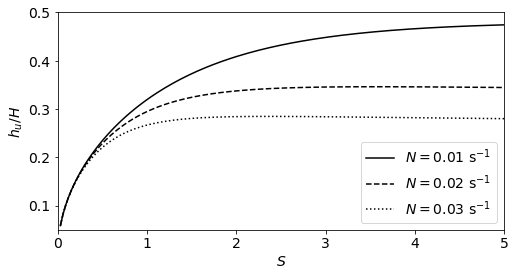

In [64]:
fig, ax = plt.subplots(figsize=(8, 4))
for n, ylim, ylabel in zip(range(1), [(0.05, 0.5), (0.3, 1.8)], ['$h_u/H$', '$x_u/L_d$']):
    ax.set_xlim([0, 5])
    ax.set_ylim(ylim)
    ax.set_xlabel('$S$')
    ax.set_ylabel(ylabel)
    #ax.text(0.02, 0.94, f'({chr(97+n)})', transform=ax.transAxes)

for N, ls in zip([0.01, 0.02, 0.03], ['-', '--', ':']):
    ax.plot(S[:, 0], h_u[N], 'k', linestyle=ls, label=f'$N={N:.2f}$ s$^{{-1}}$')
    #axs[1].plot(S[:, 0], x_u[N], 'k', linestyle=ls)
    
ax.legend(loc=4)

fig.savefig('/home/bmoorema/Desktop/PPNW2020/slides/figures/theory_curves.pdf', bbox_inches='tight')

/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in arccos


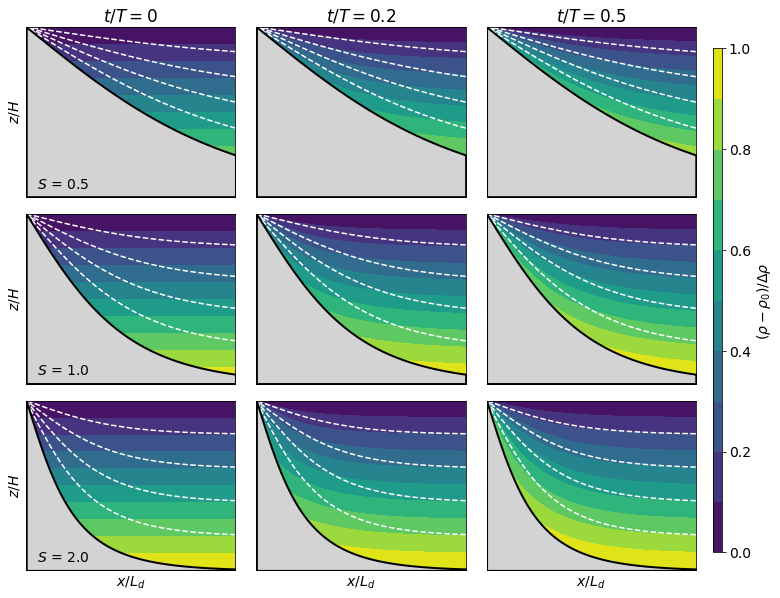

In [17]:
# Define parameters
g, f, rho_0, tau, N = 9.81, 1e-4, 1e3, 0.1, 0.01

# Make figure layout
fig, axs = plt.subplots(3, 3, figsize=(12, 10), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

# Define parameters and dimensions
xi, zi = np.arange(0, 2.01, 0.01), np.arange(-1, 0.01, 0.01)
x, z = np.meshgrid(xi, zi)

# Loop through Burger numbers
for n, row, alpha in zip(range(3), axs, [0.005, 0.01, 0.02]):

    # Calculate shared terms
    S = alpha * N / f
    mu = np.arctan(S)
    z_b = -1 / mu * np.arctan(np.tan(mu) * np.tanh(mu * xi))
    psi = -np.arctan(np.cosh(mu*x) / np.sinh(mu*x) * np.tan(mu*z)) / mu
    weight = np.sin(2*mu*z)**2 / (np.cosh(2*mu*x) - np.cos(2*mu*z))
    
    for ax, t in zip(row, [0, 0.2, 0.5]):
        
        rho = np.arccos(np.cos(2*mu*z) - weight * (1 - np.exp(-2*mu*t))) / (2 * mu)
        
        c = ax.contourf(x, z, rho, levels=np.arange(0, 1.1, 0.1), cmap='viridis', zorder=0)
        ax.contour(x, z, psi, levels=np.arange(0.2, 0.9, 0.2), colors='w', linestyles='dashed', zorder=0)
        ax.fill_between(xi, z_b, -1, facecolor='lightgray', edgecolor='k', linewidth=2, zorder=1)
        ax.set_xlim([0, 2])
        ax.set_ylim([-1, 0])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        if n == 0: ax.set_title(f'$t/T={t}$')
        if n == 2: ax.set_xlabel('$x/L_d$')
        if t == 0:
            ax.set_ylabel('$z/H$')
            ax.text(0.05, 0.05, f'$S$ = {S:.1f}', transform=row[0].transAxes, zorder=2)

cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])            
fig.colorbar(c, cax=cax, label='$(\\rho - \\rho_0)/\Delta\\rho$')
fig.savefig('/home/bmoorema/Desktop/CMOS2020/figs/choboter_density.pdf', bbox_inches='tight')

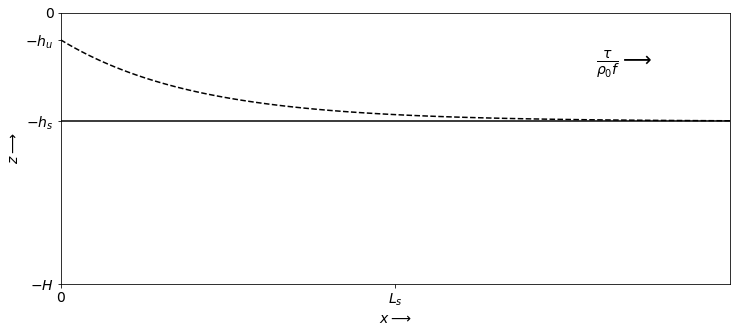

In [7]:
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xlim([0, 1])
ax.set_ylim([-1, 0])
ax.set_xlabel('$x \longrightarrow$')
ax.set_ylabel('$z \longrightarrow$')
ax.xaxis.set_ticks([0, 0.5])
ax.xaxis.set_ticklabels([0, '$L_s$'])
ax.yaxis.set_ticks([-1, -0.4, -0.1, 0])
ax.yaxis.set_ticklabels(['$-H$', '$-h_s$', '$-h_u$', 0])

ax.plot([0, 1], [-0.4, -0.4], 'k-')
ax.plot(x, 0.3 * np.exp(-x*5) - 0.4, 'k--')
ax.text(0.8, 0.8, '$\\frac{\\tau}{\\rho_0f} \longrightarrow$', transform=ax.transAxes, fontsize=20)

fig.savefig('/home/bmoorema/Desktop/PPNW2020/slides/figures/linear_diagram.pdf', bbox_inches='tight')

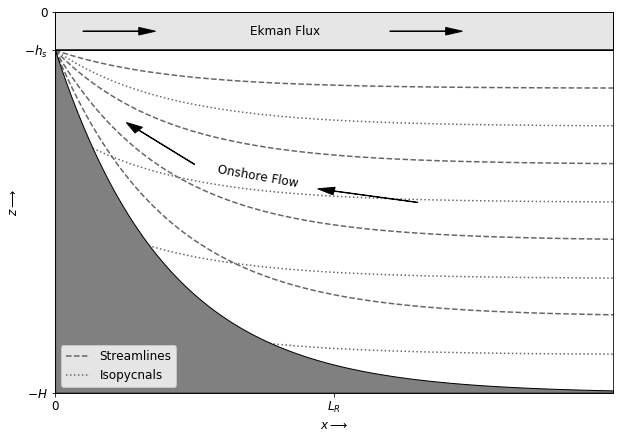

In [98]:
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim([0, 1])
ax.set_ylim([-1, 0])
ax.set_xlabel('$x \longrightarrow$')
ax.set_ylabel('$z \longrightarrow$')
ax.xaxis.set_ticks([0, 0.5])
ax.xaxis.set_ticklabels([0, '$L_R$'])
ax.yaxis.set_ticks([-1, -0.1, 0])
ax.yaxis.set_ticklabels(['$-H$', '$-h_s$', 0])

# Plot pycnocline and bathymetry
ax.plot([0, 1], [-0.1, -0.1], 'k-')
ax.fill_between([0, 1], [0, 0], -0.1, facecolor=[0.9, 0.9, 0.9], edgecolor='k')
ax.fill_between(x, 0.9 * np.exp(-x*5) - 1, -1, facecolor='gray', edgecolor='k')

# Plot isopycnals
for y in [0.1, 0.3, 0.5, 0.7]:
    if y == 0.1: label1, label2 = 'Streamlines', 'Isopycnals'
    else: label1, label2 = None, None
    ax.plot(x, y * np.exp(-x*5) - y - 0.1, '--', color=[0.4, 0.4, 0.4], zorder=0, label=label1)
    ax.plot(x, 0.2 * np.exp(-x*5) - y - 0.2, ':', color=[0.4, 0.4, 0.4], zorder=0, label=label2)

ax.arrow(0.25, -0.4, -0.1, 0.09, head_width=0.02, fc='k')
ax.arrow(0.65, -0.5, -0.15, 0.03, head_width=0.02, fc='k')
ax.arrow(0.05, -0.05, 0.1, 0, head_width=0.02, fc='k')
ax.arrow(0.6, -0.05, 0.1, 0, head_width=0.02, fc='k')
ax.text(0.35, 0.94, 'Ekman Flux', transform=ax.transAxes)
ax.text(0.29, 0.54, 'Onshore Flow', transform=ax.transAxes, rotation=-10)

ax.legend()

fig.savefig('/home/bmoorema/Desktop/figs_2020/model_diagram.pdf', bbox_inches='tight')